In [2]:
import numpy as np
import pandas as pd
from timeit import timeit
import matplotlib  
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns

1)

In [ ]:
def check(n, p, l):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    y = np.random.uniform(low=-1, high=1, size=(n,1))
    sym_n = np.dot(X, X.T)
    sym_p = np.dot(X.T, X)
    inver1 = np.linalg.solve(sym_n + l * np.identity(n), y)
    val_left = np.dot(X.T, inver1)
    inver2 = np.linalg.solve(sym_p + l * np.identity(p), np.dot(X.T, y))
    val_right = inver2
    if np.allclose(val_left, val_right):
        print("The equation is OK!")
    else:
        print("The equation is not true.")
    return 
check(100, 2000, 1e-5)
check(2000, 100, 1e-5)

In [ ]:
def right(n,p):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    y = np.random.uniform(low=-1, high=1, size=(n,1))
    val_right = np.linalg.solve(np.dot(X.T, X) + 1e-5 * np.identity(p), np.dot(X.T, y))
    return val_right

def left(n,p):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    y = np.random.uniform(low=-1, high=1, size=(n,1))  
    val_left = np.dot(X.T, np.linalg.solve(np.dot(X, X.T) + 1e-5 * np.identity(n), y))
    return val_left
def t_compare(n, p):
    t_left = timeit('left(n, p)', number=1000)
    t_right = timeit('right(n, p)', number=1000)
    if t_left > t_right:
        print("The right side of the equation computes more efficiently!")
    else:
        print("The left side of the equation computes more efficiently!")
    return t_left, t_right

In [ ]:
t_compare(1000, 100)

2) Random matrix spectrum

In [ ]:
def distribution(n, p, law):
    if law = 'Uniform':
        rand_M = np.random.uniform(-2 * sqrt(3), 2 * sqrt(3), (n,p))
    elif law = 'uniform'
        rand_M = np.random.cauchy
    elif law = 'beta'

In [8]:
help(np.random.noncentral_chisquare)

Help on built-in function noncentral_chisquare:

noncentral_chisquare(...) method of numpy.random.mtrand.RandomState instance
    noncentral_chisquare(df, nonc, size=None)
    
    Draw samples from a noncentral chi-square distribution.
    
    The noncentral :math:`\chi^2` distribution is a generalization of
    the :math:`\chi^2` distribution.
    
    .. note::
        New code should use the ``noncentral_chisquare`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    df : float or array_like of floats
        Degrees of freedom, must be > 0.
    
        .. versionchanged:: 1.10.0
           Earlier NumPy versions required dfnum > 1.
    nonc : float or array_like of floats
        Non-centrality, must be non-negative.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a 

3)

In [4]:
def Power(n, p, n_iter):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    u = np.random.rand(X.shape[0]) # create a random N*1 vector
    v = np.random.rand(X.shape[1]) # create a random P*1 vector
    for i in range(n_iter):
        u = np.dot(X, v)
        v = np.dot(X.T, u)
        v = v / np.linalg.norm(v, ord=2)
        u = u / np.linalg.norm(u, ord=2)
    return u,v
Power(4, 3, 100)

(array([-0.40064455, -0.48908501, -0.25784611,  0.73061288]),
 array([-0.00704109,  0.96489204, -0.26255243]))

In [9]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs

def Power(n, p, n_iter):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    u = np.random.rand(X.shape[0]) # create a random N*1 vector
    v = np.random.rand(X.shape[1]) # create a random P*1 vector
    U = []
    V = []
    for i in range(n_iter):
        u = np.dot(X, v)
        v = np.dot(X.T, u)
        v = v / np.linalg.norm(v, ord=2)
        u = u / np.linalg.norm(u, ord=2)
        U.append(u)
        V.append(v)
    U = np.array(U).T
    V = np.array(V).T
    return U,V,X

u_iter, v_iter, X= Power(4,3,10)

In [25]:
# find eigenvector with the largest eigenvalue
eigvec, eigval, eig = scipy.sparse.linalg.svds(X, k=1, which='LM')
np.shape(u_iter)

(4, 10)

In [26]:
eigvec_n = np.tile(eigvec.T, (4, 10))
distance = eigvec - u_iter
distance_n = np.linalg.norm(eigval - u_iter, axis=0)
print(distance_n)
print(distance)

[10.21541915 10.62452362 10.65017995 10.63361709 10.62621719 10.62378091
 10.6230346  10.62281094 10.62274439 10.62272463]
[[ 0.5542611   0.34007582  0.08371907 -0.00826739 -0.03638096 -0.04477832
  -0.04727381 -0.04801424 -0.04823381 -0.04829891]
 [ 1.00645243  1.43161046  1.52528924  1.53541276  1.53649514  1.53663604
   1.53666101  1.53666683  1.53666841  1.53666886]
 [ 0.79394328  1.09709046  1.17561441  1.18772458  1.19007685  1.19066007
   1.19082262  1.19086987  1.19088379  1.19088791]
 [-0.98803837 -0.65272451 -0.51418831 -0.47955786 -0.47055311 -0.4680379
  -0.46730976 -0.46709585 -0.46703265 -0.46701394]]


4) 

In [3]:
defra_com = pd.read_csv("http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv", sep=';', index_col=0)
defra_com

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209
Sugars,156,175,147,139
Fresh potatoes,720,874,566,1033
Fresh Veg,253,265,171,143
Other Veg,488,570,418,355
Processed potatoes,198,203,220,187


In [4]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
defra_scaled = scaler.fit_transform(defra_com)
np.shape(defra_scaled)

(17, 4)

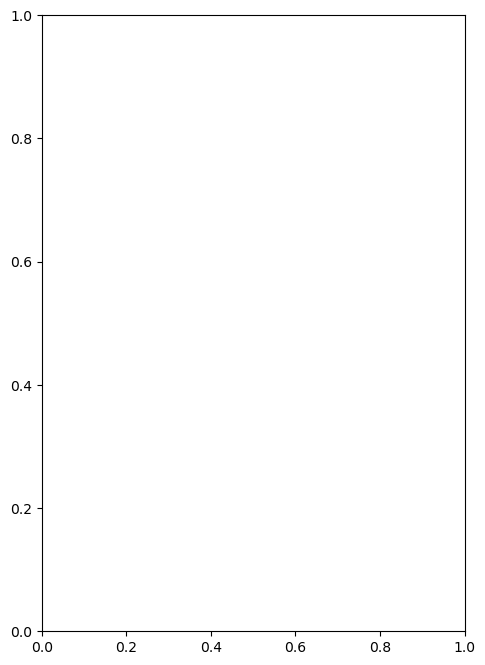

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault) 

fig, ax = plt.subplots(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('England and Wales')
plt.scatter(defra_com.iloc[:, 0], defra_com.iloc[:, 1], c='blue', s=60, alpha=0.7)
plt.xlabel(defra_com.columns[0])
plt.ylabel(defra_com.columns[1])

from mpl_toolkits import mplot3d
ax2 = plt.axes(projection='3d')
# data for the three dimension scattored points
plt.subplot(1, 2, 2)
zdata = defra_com.England
xdata = defra_com.Wales
ydata = defra_com.Scotland
ax2.scatter3D(xdata, ydata, zdata, cmap='gray')

EX 5

In [53]:
auto_mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'carname'],
      dtype='object')

In [95]:
filename = "auto-mpg.data-original"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'carname']
auto_mpg = pd.read_csv(filename, names=column_names, sep=r"\s+")
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [96]:
auto_mpg.isna().sum()
auto_mpg.dropna(axis=0, how="any", inplace=True)
auto_mpg.drop('carname', axis=1, inplace=True)
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [115]:
auto_mpg.iloc[[0,10]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
15,15.0,8.0,383.0,170.0,3563.0,10.0,70.0,1.0


In [93]:
one_hot_encoding_columns = ['USA', 'Europe', 'Japan'];
sample = auto_mpg.iloc[row=[23,24,25,62,63,64,128,129,230]]
sample

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
29,26.0,4.0,121.0,113.0,2234.0,12.5,70.0,2.0
30,21.0,6.0,199.0,90.0,2648.0,15.0,70.0,1.0
31,10.0,8.0,360.0,215.0,4615.0,14.0,70.0,1.0
70,14.0,8.0,400.0,175.0,4385.0,12.0,72.0,1.0
71,15.0,8.0,318.0,150.0,4135.0,13.5,72.0,1.0
72,14.0,8.0,351.0,153.0,4129.0,13.0,72.0,1.0
137,26.0,4.0,122.0,80.0,2451.0,16.5,74.0,1.0
138,32.0,4.0,71.0,65.0,1836.0,21.0,74.0,3.0
239,16.0,8.0,351.0,149.0,4335.0,14.5,77.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
auto_mpg_scaled = scaler.transform(auto_mpg)
tarauto_mpg_scaled
model = LinearRegression(fit_intercept=True)
model.fit()